## Setup

In [1]:
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.image as mp_image
import seaborn as sns
import numpy as np
import os

# google drive
from google.colab import drive # Connect colab to google drive

# sklearn libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
drive.mount('/drive') 
%cd /drive/MyDrive/W210 - Capstone/
data_dir = './Data/'

Mounted at /drive
/drive/MyDrive/W210 - Capstone


In [ ]:
# model_name = 'resnet_split1_3e'
# split = 'split_1'

In [24]:
def plot_confusion(labels, predictions, normalize = True): 
    
    if normalize:
        norm = 'true'
        fmt = '.1%'
    else: 
        norm = None
        fmt = 'g'

    labs_unique = np.sort(labels.unique())

    c_matrix = confusion_matrix(labels, predictions, normalize = norm)
    plt.title("Confusion matrix")
    sns.heatmap(c_matrix, cmap='Blues', annot=True, 
                xticklabels=labs_unique, yticklabels=labs_unique, 
                fmt=fmt, cbar=True)
    plt.xlabel('predictions')
    plt.ylabel('true labels')
    plt.show()

## Data Load


In [ ]:
# Model input 
# full_data = pd.read_csv(data_dir + 'full_data.csv', index_col = 0).rename(columns = {'duplicated': 'duplicate', 
#                                                                                      'class':'label', 
#                                                                                      'dataset': 'split_0'})
# data = data[data['label'] != 'Autoimmue Disorder']
# full_data['label_idx'] = pd.Categorical(full_data['label']).codes
# small_data = data.sample(n = dev_sample, random_state = seed)

#### Find all of the different model predictions to evaluate

In [26]:
model_files = pd.Series(os.listdir('./Models/'))
mod_pred_files = model_files[model_files.str.contains('pkl')]
model_split_dict = {'model_resnet_full_preds.pkl':'split_0', # dataset
                    'resnet_split3_3e_preds.pkl': 'split_3',
                    'resnet_split2_3e_preds.pkl': 'split_2',
                    'resnet_split1_3e_preds.pkl': 'split_1',
                    'resnet_split4_3e_preds.pkl': 'split_4',
                    'resnet_split5_3e_preds.pkl': 'split_5',
                    'resnet_split6_3e_preds.pkl': 'split_6',
                    'resnet_split2_5e_preds.pkl': 'split_2',
                    'resnet_split7_3e_preds.pkl': 'split_7' 
                    # 'resnet_split1_3e_2_preds.pkl': 'split_1', # split_1a
                    }

model_label_dict = {'split_0':'label', 
                    'split_3':'label',
                    'split_2':'label',
                    'split_1':'label',
                    'split_4':'label_1',
                    'split_5':'label_2',
                    'split_6':'label_3', 
                    'split_7':'label'
                    }

#### Model input data - Train, Test, val, splits and paths

In [27]:
# # Read in image data
data = pd.read_csv(data_dir + 'full_data.csv', index_col = 0).rename(columns = {'duplicated': 'duplicate', 
                                                                                     'class':'label', 
                                                                                     'dataset': 'split_0'})
# data['label_idx'] = pd.Categorical(data['label']).codes

# Separate test data
# test_data = data[data[split] == 'test'].reset_index(drop = True)

In [ ]:
# data[(data['split_1'].isna() == False) & (data['diagnosis'] == 'unknown')]

In [ ]:

# temp = pd.read_pickle(f'./Models/resnet_split3_3e_preds.pkl')
# split = 'split_3'
# temp['split'] = split

# # Isolate test input for split
# test_data = data[data[split] == 'test'].reset_index(drop = True)

# new_df = pd.concat([test_data[['image_id', 'diagnosis', 
#                             #    'age', 'sex', 'localization', 'severity',
#                                'source',  'path', 'label']], 
#                     temp[['pred', 'lab_idx', 'pred_idx']]], axis = 1)

# # Stack 
# # total_preds = pd.concat([total_preds, temp], axis = 0)

In [28]:
mod_pred_files

5     model_resnet_full_preds.pkl
9      resnet_split3_3e_preds.pkl
11     resnet_split2_3e_preds.pkl
12     resnet_split1_3e_preds.pkl
16     resnet_split4_3e_preds.pkl
18     resnet_split5_3e_preds.pkl
20     resnet_split6_3e_preds.pkl
22     resnet_split7_3e_preds.pkl
23     resnet_split2_5e_preds.pkl
dtype: object

In [29]:
mod_pred_files  = mod_pred_files.drop(23)

5     model_resnet_full_preds.pkl
9      resnet_split3_3e_preds.pkl
12     resnet_split1_3e_preds.pkl
16     resnet_split4_3e_preds.pkl
18     resnet_split5_3e_preds.pkl
20     resnet_split6_3e_preds.pkl
22     resnet_split7_3e_preds.pkl
23     resnet_split2_5e_preds.pkl
dtype: object

In [30]:
total_preds = pd.DataFrame()

for file in mod_pred_files:
    # Load prediction for split
    temp = pd.read_pickle(f'./Models/{file}')
    split = model_split_dict[file]
    temp['split'] = split
    label = model_label_dict[split]

    # Isolate test input for split
    test_data = data[data[split] == 'test'].reset_index(drop = True)
    test_data = test_data[['image_id', 'diagnosis', 
                            #    'age', 'sex', 'localization', 'severity',
                               'source',  'path', label]]
    test_data.rename(columns = {label:'label'}, inplace = True)
    
    new_df = pd.concat([test_data, 
                    temp[['pred', 'lab_idx', 'pred_idx', 'split']]], axis = 1)

    # Stack 
    total_preds = pd.concat([total_preds, new_df], axis = 0)


total_preds['correct'] = total_preds['lab_idx'] == total_preds['pred_idx']

In [27]:
# total_preds[total_preds['split'] == 'split_6'].label_3.value_counts()

Benign Marking or Mole               1761
Potentially Malignant Skin Tumors     726
Unclassified                          515
Non-Cancerous Skin Condition          464
Name: label_3, dtype: int64

In [35]:
# total_preds[total_preds['split'] == 'split_6']['label'].value_counts()

Benign Marking or Mole               1761
Potentially Malignant Skin Tumors     726
Unclassified                          515
Non-Cancerous Skin Condition          464
Name: label, dtype: int64

In [31]:
# Subset data for easy confusion plots
split_0 = total_preds[total_preds['split'] == 'split_0']
split_1 = total_preds[total_preds['split'] == 'split_1']
split_2 = total_preds[total_preds['split'] == 'split_2']
split_3 = total_preds[total_preds['split'] == 'split_3']
split_4 = total_preds[total_preds['split'] == 'split_4']
split_5 = total_preds[total_preds['split'] == 'split_5']
split_6 = total_preds[total_preds['split'] == 'split_6']
split_7 = total_preds[total_preds['split'] == 'split_7']

## Primarily interested in two CMs: Split 1, and split 2

We can see from split 1 we do an awful job at predicting:
1. Autoimmune disorders correctly (at all)
2. over-predicting toxins/fungal/etc
3. potentially malignant skin tumors as pot. mal. 

Interestingly, in split 2, we don't do as bad of a job at task 3, so this is something we can dig into. 

In [ ]:
# # Plot confusion matrices
# plot_confusion(split_1['label'], split_1['pred'], True)
# plot_confusion(split_2['label'], split_2['pred'], True)

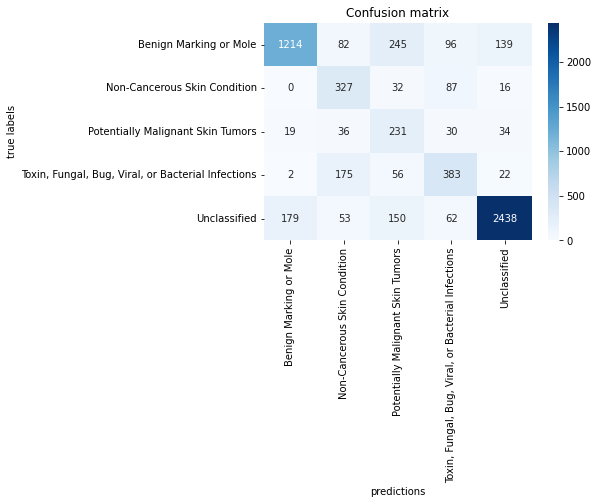

In [32]:
plot_confusion(split_2['label'], split_2['pred'], False)

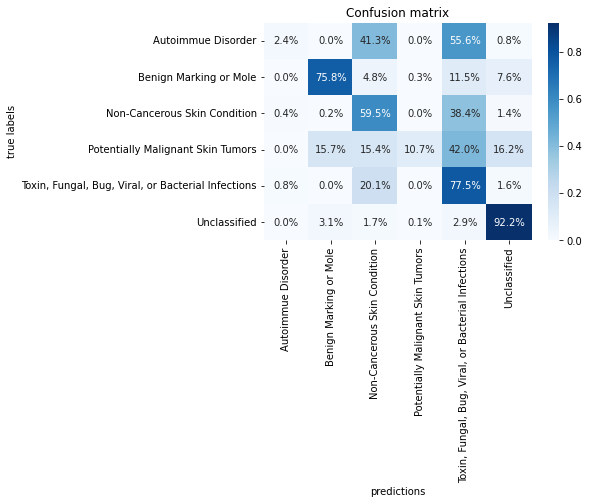

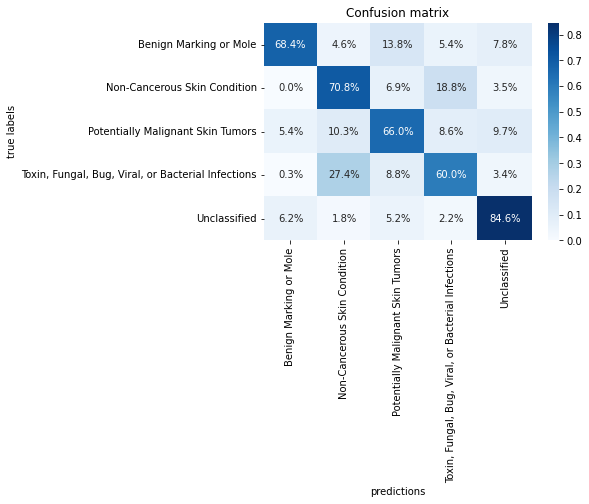

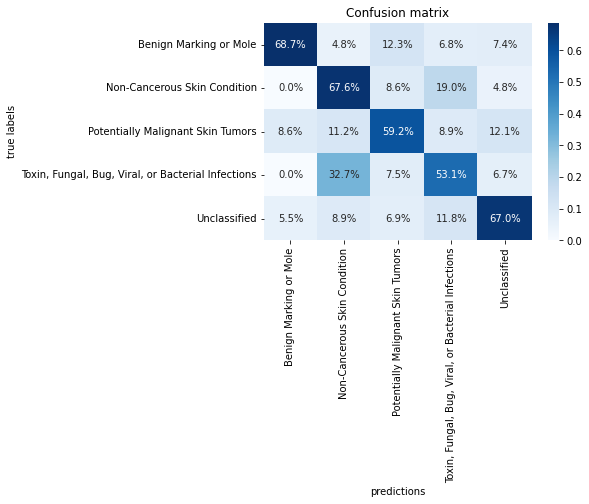

In [40]:
plot_confusion(split_1['label'], split_1['pred'], True)
plot_confusion(split_2['label'], split_2['pred'], True)
plot_confusion(split_3['label'], split_3['pred'], True)

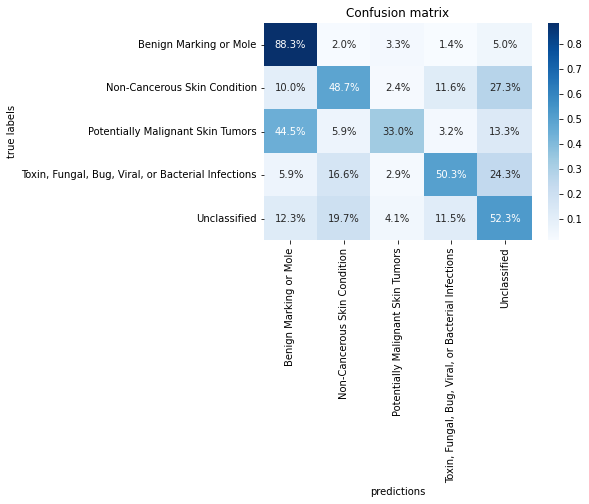

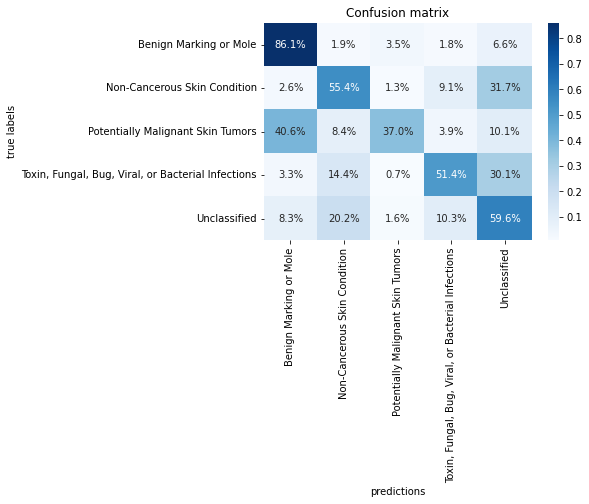

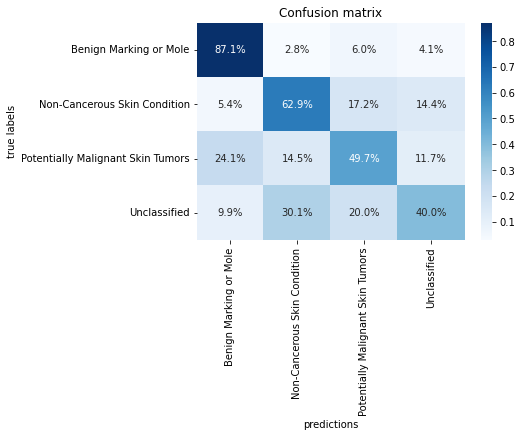

In [38]:
# Plot confusion matrices
plot_confusion(split_4['label'], split_4['pred'], True)
plot_confusion(split_5['label'], split_5['pred'], True)
plot_confusion(split_6['label'], split_6['pred'], True)


In [39]:
# Check accuracies
for s in total_preds.split.unique():
    cor = total_preds[total_preds['split'] == s]['correct'].sum()
    tot = total_preds[total_preds['split'] == s]['correct'].count()
    print(s, cor/tot)

total_preds.split.value_counts()

split_0 0.8058050032071841
split_3 0.6316666666666667
split_2 0.7519646365422397
split_1 0.7690827453495831
split_4 0.6787741203178207
split_5 0.6953260242354299
split_6 0.6904212348528563


split_0    6236
split_1    6236
split_2    6108
split_4    3524
split_5    3466
split_6    3466
split_3    1800
Name: split, dtype: int64

## Task 1: Why is autoimmune so bad at being predicted correctly? 

In [ ]:
split_1.label.unique()

array(['Benign Marking or Mole', 'Potentially Malignant Skin Tumors',
       'Unclassified',
       'Toxin, Fungal, Bug, Viral, or Bacterial Infections',
       'Autoimmue Disorder', 'Non-Cancerous Skin Condition'], dtype=object)

We can first see that autoimmune (and malignant) have very few test cases. This is likely indicative of very few train as well. Let's look into see what our data is made up of. 

In [ ]:
split_1.label.value_counts()

Unclassified                                          2851
Benign Marking or Mole                                1770
Toxin, Fungal, Bug, Viral, or Bacterial Infections     636
Non-Cancerous Skin Condition                           489
Potentially Malignant Skin Tumors                      364
Autoimmue Disorder                                     126
Name: label, dtype: int64

In [ ]:
# Subsetting the data to test cases where the ground truth is autoimmune
autoimmune = split_1[split_1['label'] == 'Autoimmue Disorder']

At first glance here, we can see that autoimmune disease is made up of 4 different diagnoses in test. what does it look like in train? 

In [ ]:
autoimmune.diagnosis.value_counts()

bullous disease photos                               61
vasculitis photos                                    49
hair loss photos alopecia and other hair diseases    15
foreign-body-granuloma                                1
Name: diagnosis, dtype: int64

Below we can see that none of these classes diagnosis have great distribution across train, val, and test. bullous, vasculitis, and hair loss are *ok*, but not great. 

In [ ]:
data[(data['label'] == 'Autoimmue Disorder')].groupby(['diagnosis', 'split_1']).count()

image_id  age  sex  \
diagnosis                                         split_1                       
bullous disease photos                            test           61   61   61   
                                                  train         413  413  413   
                                                  val            87   87   87   
dermatomyositis                                   train           1    1    1   
foreign-body-granuloma                            test            1    1    1   
                                                  train           1    1    1   
graft-vs-host-disease                             train           2    2    2   
hair loss photos alopecia and other hair diseases test           15   15   15   
                                                  train         153  153  153   
                                                  val            27   27   27   
morphea                                           train           1    1    1   
subcutaneous-t-cell-lymphoma                      train           1    1    1   
vasculitis photos                                 test           49   49   49   
                                                  train         387  387  387   
                                                  val            78   78   78   

                                                           localization  \
diagnosis                                         split_1                 
bullous disease photos                            test               61   
                                                  train             413   
                                                  val                87   
dermatomyositis                                   train               1   
foreign-body-granuloma                            test                1   
                                                  train               1   
graft-vs-host-disease                             train               2   
hair loss photos alopecia and other hair diseases test               15   
                                                  train             153   
                                                  val                27   
morphea                                           train               1   
subcutaneous-t-cell-lymphoma                      train               1   
vasculitis photos                                 test               49   
                                                  train             387   
                                                  val                78   

                                                           source  severity  \
diagnosis                                         split_1                     
bullous disease photos                            test         61        61   
                                                  train       413       413   
                                                  val          87        87   
dermatomyositis                                   train         1         1   
foreign-body-granuloma                            test          1         1   
                                                  train         1         1   
graft-vs-host-disease                             train         2         2   
hair loss photos alopecia and other hair diseases test         15        15   
                                                  train       153       153   
                                                  val          27        27   
morphea                                           train         1         1   
subcutaneous-t-cell-lymphoma                      train         1         1   
vasculitis photos                                 test         49        49   
                                                  train       387       387   
                                                  val          78        78   

                                                           pa

Can look into some of these photos further to get an idea of what they look like, and why we might want to remove them 

To start, dermatomyositis, foreign-body-granuloma, graft-vs-host-disease, morphea, and subcutaneous-t-cell-lymphoma are far too small to expect any learning from, so we can remove them entirely from further analysis. 

In [ ]:
data[(data['label'] == 'Autoimmue Disorder')]['diagnosis'].unique()
# ['vasculitis photos',
#        'hair loss photos alopecia and other hair diseases',
# #        'subcutaneous-t-cell-lymphoma', 
# #  'foreign-body-granuloma',
# #        'morphea', 
# #  'dermatomyositis', 
# #  'graft-vs-host-disease',
#        'bullous disease photos']

array(['vasculitis photos',
       'hair loss photos alopecia and other hair diseases',
       'subcutaneous-t-cell-lymphoma', 'foreign-body-granuloma',
       'morphea', 'dermatomyositis', 'graft-vs-host-disease',
       'bullous disease photos'], dtype=object)

In [ ]:
small_samples = []

auto_d = data[(data['label'] == 'Autoimmue Disorder')]['diagnosis'].unique()

for d in auto_d:
    im = data[data['diagnosis'] == d].sample(n = 1)['path'].iloc[0]
    small_samples.append(im)

samples = small_samples

Taking a look here, none of these look incredibly similar, maybe a few. 

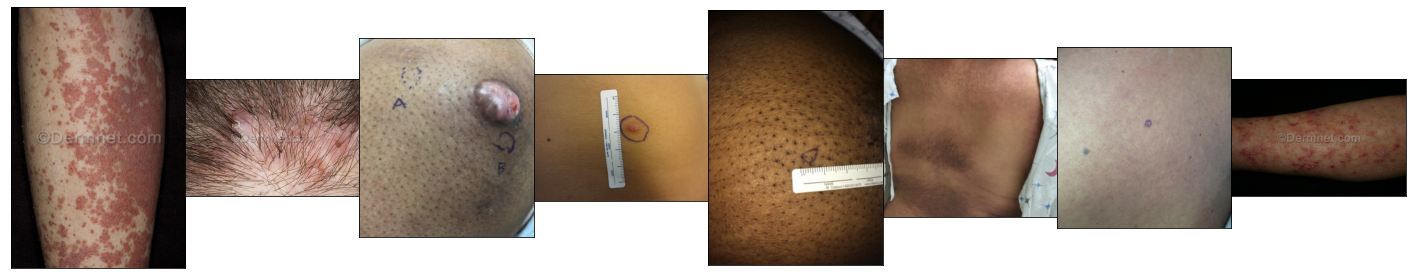

In [ ]:
n_samples = 1
diagnoses = len(auto_d)
img_count = 0

fig, axes = plt.subplots(nrows = n_samples, ncols = diagnoses, figsize = (25, 9))

# for i in range(diagnoses):
for j in range(diagnoses):
    if img_count < len(samples):
        path = samples[img_count]
        # image = mp_image.imread(train_path + 'HAM10000_images_part_1_and_2/' + samples.image_id[img_count]+'.jpg')
        image = mp_image.imread(path)

        # if i == 0:
        #     axes[i, j].set_title(samples.diagnosis[img_count], rotation = 45)
        axes[j].set_xticks([])
        axes[j].set_yticks([])
        axes[j].imshow(image)
        img_count += 1
plt.subplots_adjust(wspace = 0, hspace = 0)

Let's see when we just look at our larger-class examples

In [ ]:
diags = ['vasculitis photos',
         'hair loss photos alopecia and other hair diseases',
         'bullous disease photos']

In [ ]:
samples = pd.DataFrame()

for d in diags:
    im = data[data['diagnosis'] == d].sample(10)['path'].iloc[:10]
    samples = pd.concat([samples, im])



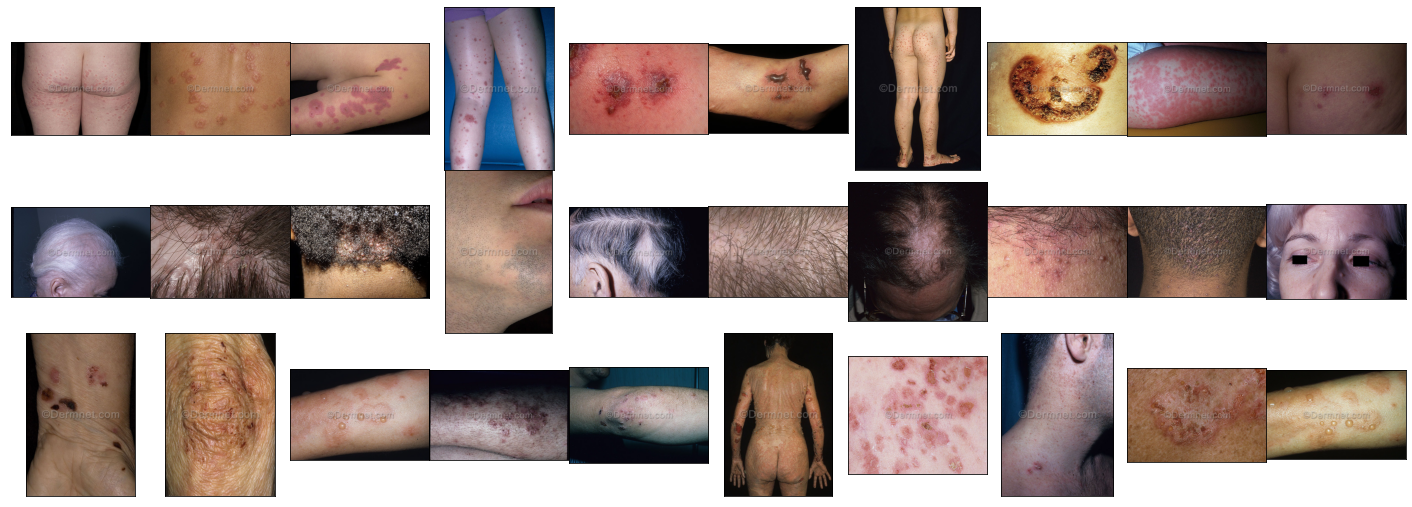

In [ ]:
samples = samples[0]
n_samples = 10
diagnoses = 3
img_count = 0

fig, axes = plt.subplots(nrows = diagnoses, ncols = n_samples, figsize = (25, 9))

for i in range(diagnoses):
    for j in range(n_samples):
        if img_count < len(samples):
            path = samples.iloc[img_count]
            # image = mp_image.imread(train_path + 'HAM10000_images_part_1_and_2/' + samples.image_id[img_count]+'.jpg')
            image = mp_image.imread(path)

            # if i == 0:
            #     axes[i, j].set_title(samples.diagnosis[img_count], rotation = 45)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            axes[i, j].imshow(image)
            img_count += 1
plt.subplots_adjust(wspace = 0, hspace = 0)

## Task 2: Why are toxins overpredicted?

In [ ]:
toxins = split_1[split_1['label'] == 'Toxin, Fungal, Bug, Viral, or Bacterial Infections']

Again, in test we can see that we have a number of diagnosis that are heavily under-represented. Let's see how these splits look across train, val, test

In [ ]:
toxins.diagnosis.value_counts()

tinea ringworm candidiasis and other fungal infections    180
warts molluscum and other viral infections                129
nail fungus and other nail disease                        107
exanthems and drug eruptions                               54
scabies lyme disease and other infestations and bites      44
urticaria hives                                            34
poison ivy photos and other contact dermatitis             31
herpes hpv and other stds photos                           31
cellulitis impetigo and other bacterial infections         20
verruca-vulgaris                                            5
abscess                                                     1
Name: diagnosis, dtype: int64

In [ ]:
cl = 'Toxin, Fungal, Bug, Viral, or Bacterial Infections'
data[(data['label'] == cl)].groupby(['diagnosis', 'split_1'])\
                           .count()

image_id   age  \
diagnosis                                          split_1                   
abscess                                            test            1     1   
cellulitis impetigo and other bacterial infections test           20    20   
                                                   train         263   263   
                                                   val            73    73   
coccidioidomycosis                                 train           1     1   
condyloma-accuminatum                              train           2     2   
exanthems and drug eruptions                       test           54    54   
                                                   train         357   357   
                                                   val            86    86   
folliculitis                                       train           1     1   
herpes hpv and other stds photos                   test           31    31   
                                                   train         311   311   
                                                   val            60    60   
molluscum-contagiosum                              train           5     5   
                                                   val             1     1   
nail fungus and other nail disease                 test          107   107   
                                                   train         787   787   
                                                   val           171   171   
onychomycosis                                      train           2     2   
poison ivy photos and other contact dermatitis     test           31    31   
                                                   train         248   248   
                                                   val            46    46   
scabies lyme disease and other infestations and... test           44    44   
                                                   train         420   420   
                                                   val            75    75   
tinea ringworm candidiasis and other fungal inf... test          180   180   
                                                   train        1216  1216   
                                                   val           216   216   
tinea-pedis                                        train           1     1   
urticaria hives                                    test           34    34   
                                                   train         200   200   
                                                   val            31    31   
verruca-vulgaris                                   test            5     5   
                                                   train          37    37   
                                                   val             8     8   
wart                                               train           1     1   
warts molluscum and other viral infections         test          129   129   
                                                   train        1008  1008   
                                                   val           205   205   

                                                             sex  \
diagnosis                                          split_1         
abscess                                            test        1   
cellulitis impetigo and other bacterial infections test       20   
                                                   train     263   
                                                   val        73   
coccidioidomycosis                                 train       1   
condyloma-accuminatum                              train       2   
exanthems and drug eruptions                       test       54   
                                                   train     357   
                                                   val        86   
folliculitis                                       train       1   
herpes hpv and other stds photos             

Explore just taking the top 3

In [ ]:
data[(data['label'] == cl) & 
     (data['split_1'] == 'train')]['diagnosis']\
                                  .value_counts()[:3]

tinea ringworm candidiasis and other fungal infections    1216
warts molluscum and other viral infections                1008
nail fungus and other nail disease                         787
Name: diagnosis, dtype: int64

when we are wrong, let's see which diagnoses are pinging. We can see there's a heavy correlation between % of correct, and # of images

In [ ]:
toxins.groupby(['diagnosis', 'correct']).count()

image_id  source  \
diagnosis                                          correct                     
abscess                                            False           1       1   
cellulitis impetigo and other bacterial infections False           5       5   
                                                   True           15      15   
exanthems and drug eruptions                       False          20      20   
                                                   True           34      34   
herpes hpv and other stds photos                   False           7       7   
                                                   True           24      24   
nail fungus and other nail disease                 False           2       2   
                                                   True          105     105   
poison ivy photos and other contact dermatitis     False          14      14   
                                                   True           17      17   
scabies lyme disease and other infestations and... False          13      13   
                                                   True           31      31   
tinea ringworm candidiasis and other fungal inf... False          43      43   
                                                   True          137     137   
urticaria hives                                    False          14      14   
                                                   True           20      20   
verruca-vulgaris                                   False           5       5   
warts molluscum and other viral infections         False          19      19   
                                                   True          110     110   

                                                            path  label  pred  \
diagnosis                                          correct                      
abscess                                            False       1      1     1   
cellulitis impetigo and other bacterial infections False       5      5     5   
                                                   True       15     15    15   
exanthems and drug eruptions                       False      20     20    20   
                                                   True       34     34    34   
herpes hpv and other stds photos                   False       7      7     7   
                                                   True       24     24    24   
nail fungus and other nail disease                 False       2      2     2   
                                                   True      105    105   105   
poison ivy photos and other contact dermatitis     False      14     14    14   
                                                   True       17     17    17   
scabies lyme disease and other infestations and... False      13     13    13   
                                                   True       31     31    31   
tinea ringworm candidiasis and other fungal inf... False      43     43    43   
                                                   True      137    137   137   
urticaria hives                                    False      14     14    14   
                                                   True       20     20    20   
verruca-vulgaris                                   False       5      5     5   
warts molluscum and other viral infections         False      19     19    19   
                                                   True      110    110   110   

                                                            lab_idx  pred_idx  \
diagnosis                                          correct                      
abscess                                            False          1         1   
cellulitis impetigo and other bacterial infections False          5         5   
                                                   True          15        15   
exanthems and drug eruptions                       False         20        20   
                              

In [ ]:
data.label.value_counts()

Unclassified                                          28497
Benign Marking or Mole                                17918
Toxin, Fungal, Bug, Viral, or Bacterial Infections     6723
Non-Cancerous Skin Condition                           4812
Potentially Malignant Skin Tumors                      3613
Autoimmue Disorder                                     1388
Name: label, dtype: int64

In [ ]:
data[data['label'].isin(['Non-Cancerous Skin Condition', cl])]

,image_id,diagnosis,age,sex,localization,source,severity,path,label,duplicate,split_0,split_1,split_2,split_3,label_idx
288,fissure-2,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Nail Fungus and other Nai...,Non-Cancerous Skin Condition,True,NaN,NaN,NaN,NaN,2
319,id-reaction-10,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Tinea Ringworm Candidiasi...,Non-Cancerous Skin Condition,True,NaN,NaN,NaN,NaN,2
344,id-reaction-7,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Tinea Ringworm Candidiasi...,Non-Cancerous Skin Condition,True,NaN,NaN,NaN,NaN,2
363,fissure-5,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Nail Fungus and other Nai...,Non-Cancerous Skin Condition,True,NaN,NaN,NaN,NaN,2
391,id-reaction-1,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Tinea Ringworm Candidiasi...,Non-Cancerous Skin Condition,True,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17363,syphilis-17,herpes hpv and other stds photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Herpes HPV and other STDs...,"Toxin, Fungal, Bug, Viral, or Bacterial Infect...",False,test,test,train,NaN,4
17365,herpes-type-2-recurrent-7,herpes hpv and other stds photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Herpes HPV and other STDs...,"Toxin, Fungal, Bug, Viral, or Bacterial Infect...",False,train,train,train,NaN,4
17367,warts-mouth-6,herpes hpv and other stds photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Herpes HPV and other STDs...,"Toxin, Fungal, Bug, Viral, or Bacterial Infect...",False,test,test,train,train,4
17373,warts-mouth-4,herpes hpv and other stds photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Herpes HPV and other STDs...,"Toxin, Fungal, Bug, Viral, or Bacterial Infect...",False,train,train,test,NaN,4


From this we can see taht we're mostly calling these non-cancerous skin conditions. There is not enough difference between things we consider toxins vs. non-cancerous. 

In [ ]:
toxins[toxins['correct'] == False].groupby(['diagnosis', 'pred']).count()

image_id  \
diagnosis                                          pred                                     
abscess                                            Unclassified                         1   
cellulitis impetigo and other bacterial infections Non-Cancerous Skin Condition         5   
exanthems and drug eruptions                       Non-Cancerous Skin Condition        20   
herpes hpv and other stds photos                   Autoimmue Disorder                   1   
                                                   Non-Cancerous Skin Condition         6   
nail fungus and other nail disease                 Non-Cancerous Skin Condition         2   
poison ivy photos and other contact dermatitis     Non-Cancerous Skin Condition        14   
scabies lyme disease and other infestations and... Non-Cancerous Skin Condition        12   
                                                   Unclassified                         1   
tinea ringworm candidiasis and other fungal inf... Autoimmue Disorder                   3   
                                                   Non-Cancerous Skin Condition        39   
                                                   Unclassified                         1   
urticaria hives                                    Non-Cancerous Skin Condition        14   
verruca-vulgaris                                   Unclassified                         5   
warts molluscum and other viral infections         Autoimmue Disorder                   1   
                                                   Non-Cancerous Skin Condition        16   
                                                   Unclassified                         2   

                                                                                 source  \
diagnosis                                          pred                                   
abscess                                            Unclassified                       1   
cellulitis impetigo and other bacterial infections Non-Cancerous Skin Condition       5   
exanthems and drug eruptions                       Non-Cancerous Skin Condition      20   
herpes hpv and other stds photos                   Autoimmue Disorder                 1   
                                                   Non-Cancerous Skin Condition       6   
nail fungus and other nail disease                 Non-Cancerous Skin Condition       2   
poison ivy photos and other contact dermatitis     Non-Cancerous Skin Condition      14   
scabies lyme disease and other infestations and... Non-Cancerous Skin Condition      12   
                                                   Unclassified                       1   
tinea ringworm candidiasis and other fungal inf... Autoimmue Disorder                 3   
                                                   Non-Cancerous Skin Condition      39   
                                                   Unclassified                       1   
urticaria hives                                    Non-Cancerous Skin Condition      14   
verruca-vulgaris                                   Unclassified                       5   
warts molluscum and other viral infections         Autoimmue Disorder                 1   
                                                   Non-Cancerous Skin Condition      16   
                                                   Unclassified                       2   

                                                                                 path  \
diagnosis                                          pred                                 
abscess                                            Unclassified                     1   
cellulitis impetigo and other bacterial infections Non-Cancerous Skin Condition     5   
exanthems and drug eruptions                       Non-Cancerous Skin Condition    20   
herpes hpv and other stds photos                   Autoimmue Disorder               1   
                                                 

## Split 3: Why are we predicting non-cancerous as toxins

In [ ]:
malignant = split_1[split_1['label'] == 'Potentially Malignant Skin Tumors']
malignant[malignant['correct'] == False].groupby(['diagnosis', 'pred']).count()

image_id  \
diagnosis                                          pred                                                           
actinic keratoses                                  Benign Marking or Mole                                    19   
                                                   Unclassified                                               3   
actinic keratosis basal cell carcinoma and othe... Non-Cancerous Skin Condition                              51   
                                                   Toxin, Fungal, Bug, Viral, or Bacterial Infections        99   
                                                   Unclassified                                               7   
basal cell carcinoma                               Benign Marking or Mole                                    19   
                                                   Unclassified                                               5   
basal-cell-carcinoma                               Unclassified                                               1   
basal-cell-carcinoma-nodular                       Benign Marking or Mole                                     1   
melanoma                                           Benign Marking or Mole                                    15   
                                                   Unclassified                                              36   
melanoma skin cancer nevi and moles                Benign Marking or Mole                                     1   
                                                   Non-Cancerous Skin Condition                               5   
                                                   Toxin, Fungal, Bug, Viral, or Bacterial Infections        54   
melanoma-acral-lentiginous                         Benign Marking or Mole                                     1   
melanoma-in-situ                                   Unclassified                                               1   
mycosis-fungoides                                  Benign Marking or Mole                                     1   
                                                   Unclassified                                               1   
squamous-cell-carcinoma                            Unclassified                                               3   
squamous-cell-carcinoma-in-situ                    Unclassified                                               1   
squamous-cell-carcinoma-keratoacanthoma            Unclassified                                               1   

                                                                                                       source  \
diagnosis                                          pred                                                         
actinic keratoses                                  Benign Marking or Mole                                  19   
                                                   Unclassified                                             3   
actinic keratosis basal cell carcinoma and othe... Non-Cancerous Skin Condition                            51   
                                                   Toxin, Fungal, Bug, Viral, or Bacterial Infections      99   
                                                   Unclassified                                             7   
basal cell carcinoma                               Benign Marking or Mole                                  19   
                                                   Unclassified                                             5   
basal-cell-carcinoma                               Unclassified                                             1   
basal-cell-carcinoma-nodular                       Benign Marking or Mole                                   1   
melanoma                                           Benign Marking or Mole                                  15   
                                                   Unclassified                                      

In [ ]:
malignant[malignant['pred'] == 'Toxin, Fungal, Bug, Viral, or Bacterial Infections'].groupby(['diagnosis', 'pred']).count()

,,image_id,source,path,label,lab_idx,pred_idx,split,correct
diagnosis,pred,,,,,,,,
actinic keratosis basal cell carcinoma and other malignant lesions,"Toxin, Fungal, Bug, Viral, or Bacterial Infections",99,99,99,99,99,99,99,99
melanoma skin cancer nevi and moles,"Toxin, Fungal, Bug, Viral, or Bacterial Infections",54,54,54,54,54,54,54,54


In [ ]:
data[data['diagnosis'] == 'melanoma skin cancer nevi and moles']

,image_id,diagnosis,age,sex,localization,source,severity,path,label,duplicate,split_0,split_1,split_2,split_3,label_idx
3178,mongolian-spot-2,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/test/Light Diseases and Disorde...,Potentially Malignant Skin Tumors,True,NaN,NaN,NaN,NaN,3
19488,mongolian-spot-3,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,True,NaN,NaN,NaN,NaN,3
19528,mongolian-spot-4,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,True,NaN,NaN,NaN,NaN,3
19543,mongolian-spot-1,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,True,NaN,NaN,NaN,NaN,3
3081,atypical-nevi-dermoscopy-109,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/test/Melanoma Skin Cancer Nevi ...,Potentially Malignant Skin Tumors,False,train,NaN,val,val,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19554,spitz-nevus-7,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,False,val,NaN,train,val,3
19555,nevus-spilus-17,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,False,train,NaN,train,train,3
19556,melanotic-macule-1,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,False,train,NaN,train,train,3
19557,nevus-repigmented-4,melanoma skin cancer nevi and moles,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Melanoma Skin Cancer Nevi...,Potentially Malignant Skin Tumors,False,train,NaN,val,train,3


In [ ]:
# data[data['diagnosis'].isin(['actinic keratosis basal cell carcinoma and other malignant lesions', 'melanoma skin cancer nevi and moles'])]
data[data['label'] == 'Potentially Malignant Skin Tumors']['diagnosis'].value_counts()

actinic keratosis basal cell carcinoma and other malignant lesions    1437
melanoma                                                               591
melanoma skin cancer nevi and moles                                    579
basal cell carcinoma                                                   514
actinic keratoses                                                      327
basal-cell-carcinoma                                                    41
mycosis-fungoides                                                       32
squamous-cell-carcinoma-in-situ                                         28
squamous-cell-carcinoma                                                 17
squamous-cell-carcinoma-keratoacanthoma                                  8
melanoma-acral-lentiginous                                               7
melanoma-in-situ                                                         6
basal-cell-carcinoma-nodular                                             6
kaposi-sarcoma           

In [ ]:
# # Read in predictions from model
# pred_df = pd.read_pickle(f'./Models/{model_name}_preds.pkl')

# # Set truth value when prediction is correct
# pred_df['correct'] = pred_df['lab_idx'] == pred_df['pred_idx']

# # # Read in image data
# data = pd.read_csv(data_dir + 'full_data.csv', index_col = 0).rename(columns = {'duplicated': 'duplicate', 'class':'label'})
# data['label_idx'] = pd.Categorical(data['label']).codes

# # Separate test data
# test_data = data[data[split] == 'test'].reset_index(drop = True)

In [ ]:
# preds = pred_df['pred']
# labs = pred_df['lab']

In [ ]:
# data[data['split_1'] != 'train'].label.value_counts()

Unclassified                                          7129
Benign Marking or Mole                                6742
Potentially Malignant Skin Tumors                     2405
Toxin, Fungal, Bug, Viral, or Bacterial Infections    1863
Non-Cancerous Skin Condition                          1356
Autoimmue Disorder                                     429
Name: label, dtype: int64

In [ ]:
# pred_df.correct.sum()/pred_df.correct.count()

0.7831423895253683

In [ ]:
# research_df = pd.concat([test_data, pred_df[['pred', 'pred_idx', 'correct']]], axis = 1)

In [ ]:
# df = research_df[research_df.correct == False]

In [ ]:
# df[df.label_idx == 0].diagnosis.value_counts()

bullous disease photos                               60
vasculitis photos                                    47
hair loss photos alopecia and other hair diseases    15
foreign-body-granuloma                                1
Name: diagnosis, dtype: int64

In [ ]:
# df[df.label_idx == 3].diagnosis.value_counts()

actinic keratosis basal cell carcinoma and other malignant lesions    82
melanoma                                                              48
melanoma skin cancer nevi and moles                                   47
basal cell carcinoma                                                  17
actinic keratoses                                                     15
mycosis-fungoides                                                      2
squamous-cell-carcinoma                                                2
melanoma-in-situ                                                       1
squamous-cell-carcinoma-keratoacanthoma                                1
melanoma-acral-lentiginous                                             1
basal-cell-carcinoma-nodular                                           1
basal-cell-carcinoma                                                   1
squamous-cell-carcinoma-in-situ                                        1
Name: diagnosis, dtype: int64

In [ ]:
# derm_benign_df = research_df[(research_df.label_idx == 1) &
#                           research_df.correct == True]\
#                           .sample(10)
                          
# cancer_wrong_df = df[(df.label_idx == 3) &
#                   (df.pred_idx == 1) &
#                   (df.diagnosis == 'actinic keratosis basal cell carcinoma and other malignant lesions')]\
#                   .sample(10)

# cancer_right_df = research_df[(research_df.label_idx == 3) &
#                          (research_df.diagnosis == 'actinic keratosis basal cell carcinoma and other malignant lesions') &
#                           research_df.correct == True]\
#                           .sample(10)



In [ ]:
# benign = derm_benign_df.path
# cancer_wrong = cancer_wrong_df.path
# cancer_right = cancer_right_df.path

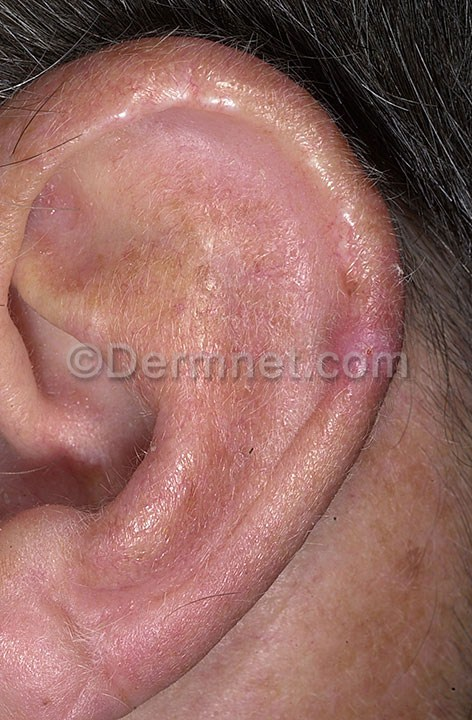

In [ ]:
# display.Image(cancer_wrong.iloc[9])

In [ ]:
# samples = pd.concat([benign, cancer_wrong, cancer_right], axis = 0)

In [ ]:
# cancer_right

4623    ./Data/dermnet/test/Actinic Keratosis Basal Ce...
6184    ./Data/dermnet/train/Actinic Keratosis Basal C...
6083    ./Data/dermnet/train/Actinic Keratosis Basal C...
6152    ./Data/dermnet/train/Actinic Keratosis Basal C...
6150    ./Data/dermnet/train/Actinic Keratosis Basal C...
6191    ./Data/dermnet/train/Actinic Keratosis Basal C...
6107    ./Data/dermnet/train/Actinic Keratosis Basal C...
6148    ./Data/dermnet/train/Actinic Keratosis Basal C...
6091    ./Data/dermnet/train/Actinic Keratosis Basal C...
4615    ./Data/dermnet/test/Actinic Keratosis Basal Ce...
Name: path, dtype: object

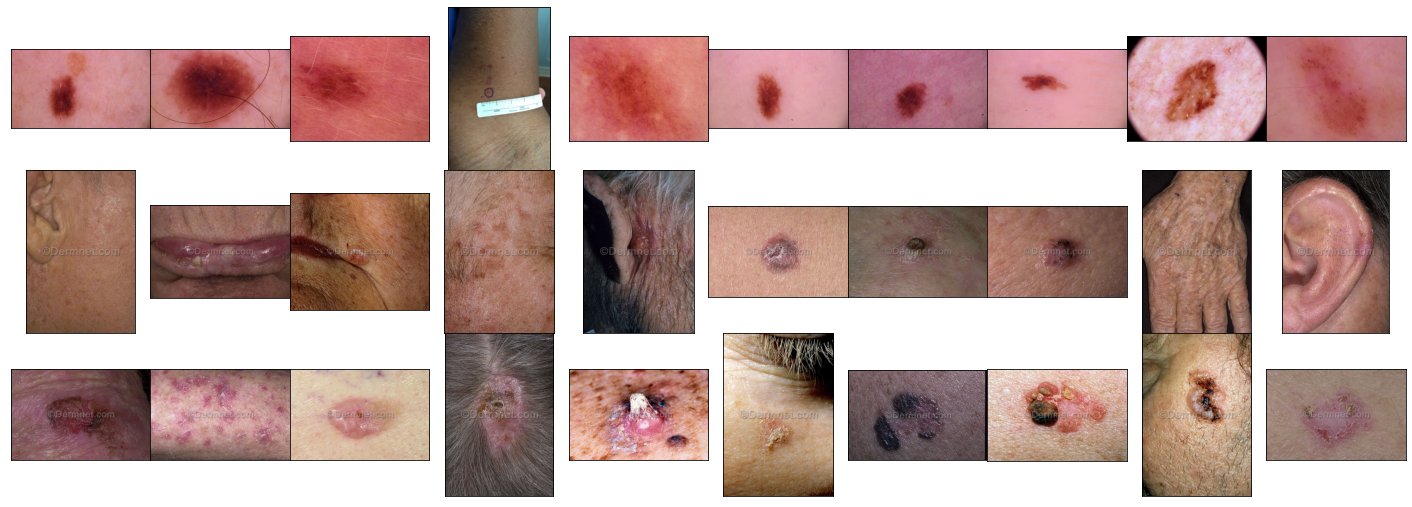

In [ ]:
# n_samples = 10
# diagnoses = 3
# img_count = 0

# fig, axes = plt.subplots(nrows = diagnoses, ncols = n_samples, figsize = (25, 9))

# for i in range(diagnoses):
#     for j in range(n_samples):
#         if img_count < len(samples):
#             path = samples.iloc[img_count]
#             # image = mp_image.imread(train_path + 'HAM10000_images_part_1_and_2/' + samples.image_id[img_count]+'.jpg')
#             image = mp_image.imread(path)

#             # if i == 0:
#             #     axes[i, j].set_title(samples.diagnosis[img_count], rotation = 45)
#             axes[i, j].set_xticks([])
#             axes[i, j].set_yticks([])
#             axes[i, j].imshow(image)
#             img_count += 1
# plt.subplots_adjust(wspace = 0, hspace = 0)

In [ ]:
# df[df.label_idx == 3]

In [ ]:
# label_map = df[['label', 'label_idx']].drop_duplicates().sort_values('label_idx')
# label_map

,label,label_idx
4292,Autoimmue Disorder,0
9,Benign Marking or Mole,1
4293,Non-Cancerous Skin Condition,2
253,Potentially Malignant Skin Tumors,3
4290,"Toxin, Fungal, Bug, Viral, or Bacterial Infect...",4
1028,Unclassified,5


In [ ]:
# df.source.value_counts()

dermnet             906
ISIC_2020           194
ISIC_2018            77
stanford_diverse     34
Name: source, dtype: int64

## Digging more into split_2, which seems to be our most sucessful

In [59]:
a = data.groupby(['split_2', 'label', 'diagnosis']).count()
# a.to_csv('./s2.csv')

In [62]:
data.label.value_counts()

Unclassified                                          28497
Benign Marking or Mole                                17918
Toxin, Fungal, Bug, Viral, or Bacterial Infections     6723
Non-Cancerous Skin Condition                           4807
Potentially Malignant Skin Tumors                      3613
Autoimmue Disorder                                     1388
Name: label, dtype: int64

In [63]:
s2 = data[data['split_2'].isna() == False]

In [65]:
s2.label.value_counts()

Benign Marking or Mole                                17882
Toxin, Fungal, Bug, Viral, or Bacterial Infections     6468
Non-Cancerous Skin Condition                           4636
Unclassified                                           4105
Potentially Malignant Skin Tumors                      3604
Name: label, dtype: int64

In [ ]:
full)